In [26]:
from _src.sys1d import KitaevChain
from _src.vqe import VQE
from matplotlib import pyplot

In [27]:
kc = KitaevChain("para.toml")
print(kc)

[KitaevChain]
# system size
  LSS = 8
# Boundary condition
  BDC = OBC
# parity
  PAR = 0
# Coupling constatnts
  CPC = {'t1': 1.0, 'D1': 0.3, 'V1': 0.1, 'mu': 0.05}



In [28]:
vqe = VQE("para.toml", kc.ham(), kc.ans(mly=2))
print(vqe)

[IniHAM]
  SysSiz = 8
  NTrm = 29

[IniANS]
  NQub = 8
  NLay = 2
  NLayGat = 29
  NIniGat = 0
  NFinGat = 0
  NPar = 58
  IniStt = 0b00000000

[IniVQE]
  MaxNIte = 10
  TicNIte = 100
  TolErr = 1e-06

[VQE]
# maximal # of minimize ite.
  MIT = 10
# tics # in each minimize ite.
  TIT = 100
# tolerence error
  TOL = 1e-06



In [29]:
vqe.ham.diag(omod=1,k=3,sbs=kc.sbs)

[EigEne]
  0 = -19.569496781166897
  1 = -16.66828223372066
  2 = -15.721081157262457



(array([-19.56949678, -16.66828223, -15.72108116]),
 array([[ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ],
        [ 0.01407931-0.03105159j, -0.01683473+0.00442571j,
          0.00351689+0.01130494j],
        [ 0.01708041-0.03767046j, -0.03331743+0.00875887j,
          0.00042579+0.00136869j],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ],
        [ 0.01476247-0.03255829j, -0.02928308+0.00769827j,
         -0.00746617-0.02399978j],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ],
        [ 0.01103522-0.02433793j,  0.0106639 -0.00280345j,
         -0.00400389-0.01287038j],
        [ 0.0132433 -0.02920779j, -0.00754827+0.00198438j,
         -0.00565157-0.01816682j],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ],
        

In [30]:
vqe.bfgs()
print(vqe.ans)

[BFGS]
  [BFGS.In]
    Ene = 0.8617727911966202
    Par = [8.988184084682622, 8.577960745506912, 11.179364612561335, 0.02305628048912532, 7.063004813660747, 7.1667739940080954, 11.569373783472066, 3.269110739696934, 10.072978742566805, 12.536089129410959, 9.517693430976196, 7.850749938697569, 2.1637406777518295, 11.435683075158078, 8.294899556515409, 10.963702246697475, 7.722572891328317, 9.329403505702926, 2.981130047576003, 4.077028673465648, 6.762816019841599, 11.407893887728008, 10.747239920741773, 6.184828293714816, 8.6806391042794, 6.304378999373612, 1.8377605587025465, 4.670896321863284, 5.741116488370596, 7.073249908614977, 3.1622664516142605, 11.3835130694152, 0.23531833080054995, 4.0454731983037755, 6.273505769262216, 1.2529460846446332, 6.879933823698265, 10.217986285697126, 4.807075730675508, 5.44079884118234, 5.056010074784511, 10.697089327749707, 3.080040304370928, 2.1130930627816285, 4.3319948908249, 5.419365175798957, 9.873880749644249, 11.083566417651777, 10.4874823897

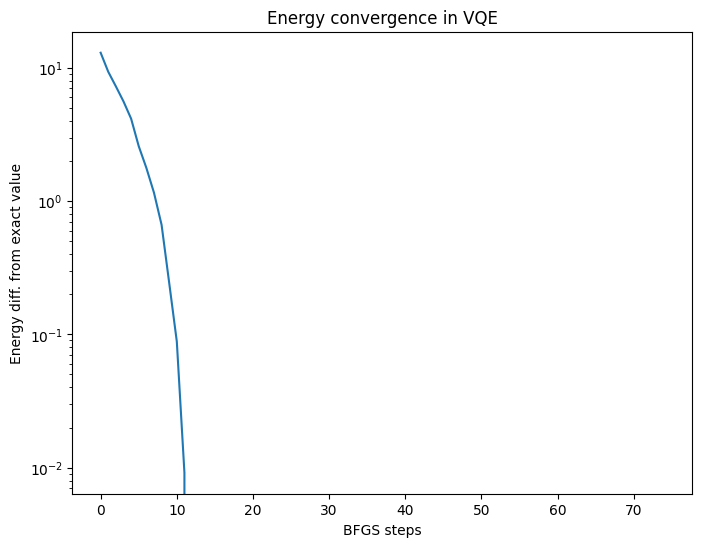

[-6.589188914249518, -10.234445553922074, -12.31129774694912, -13.973445105687608, -15.415841023927566, -16.986835133003762, -17.79340648795831, -18.412408792142433, -18.905585094785224, -19.326043620315385, -19.481114549149222, -19.56033993130316, -19.611373471694986, -19.636294601567844, -19.650115351292673, -19.65870323933775, -19.665522802656632, -19.674799348259533, -19.67994070972615, -19.686083361369118, -19.689814570489073, -19.694390327042377, -19.698004094659115, -19.704370706491368, -19.707204855910472, -19.710550599916402, -19.711614324056395, -19.71430801593061, -19.715016238646648, -19.715730695523593, -19.716336528776253, -19.71712272018972, -19.718266504399878, -19.719559231029407, -19.721188499449816, -19.723228126345024, -19.724155909686356, -19.72502504637429, -19.72575669583356, -19.72652443821316, -19.72713132471979, -19.72780758895496, -19.72877906574566, -19.729930907114554, -19.730999959761984, -19.73175540870442, -19.73280179231418, -19.733634110923983, -19.734

In [31]:
pyplot.figure(figsize=(8, 6))
ax = pyplot.gca()
ax.set_title('Energy convergence in VQE')
ax.set_xlabel('BFGS steps')
ax.set_ylabel('Energy diff. from exact value')

ax.semilogy(range(len(vqe.etb)), [n - vqe.ham.eig[0][0] for n in vqe.etb]) 
pyplot.show()

print(vqe.etb)